ChebyShev vs Hoeffding Bound

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

m = np.arange(100)
epsilon2 = 0.0025

y_cheby = [1/(4*m_i*epsilon2) for m_i in m] 
y_hoff = [2*np.exp(-2*m_i*epsilon2) for m_i in m]

plt.plot(m, y_cheby, label='Chebyshev')
plt.plot(m, y_hoff, label='Hoeffding')
plt.xlabel('m')
plt.ylabel('Bound')
plt.legend()
plt.grid(True)
plt.show()

Compare Gradient Time (Bar Plots)

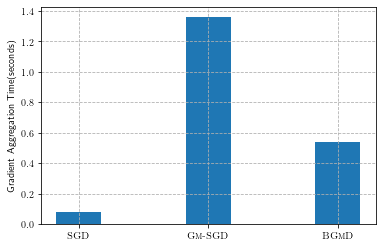

In [43]:
import matplotlib.pyplot as plt
from matplotlib import rc

grad = [0.010962245608365423, 0.008717414271775945, 0.008859736674686812]
agg = [0.0812835787678813, 1.3615191056178166, 0.5406124816272722]
ind = np.arange(3)
width = 0.35

p1 = plt.bar(ind, agg, width)
# p2 = plt.bar(ind, grad, width, bottom=agg)

rc('text', usetex=True)
plt.xticks(ind, (r"\textsc{SGD}", r"\textsc{Gm-SGD}", r"\textsc{BGmD}"))
plt.ylabel('Gradient Aggregation Time(seconds)')
plt.grid(True, which='both', linestyle='--')
#plt.legend((p1[0], p2[0]), ('Gradient Aggregation', 'Gradient Computation'))
plt.show()


Compare GM-SGD vs BGMD Complexity

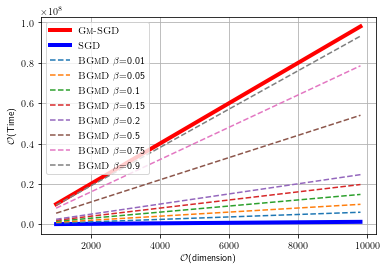

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

epsilon = 1e-2
b = 128
dim = np.arange(start=1e3, stop=1e4, step=200) # np.arange(1, 1e6, 10)

def gm_sgd(d,epsilon):
    return (d/epsilon**2)

def sgd(d, b):
    return b*d

def bgmd(d, epsilon, b, beta):
    return (d*beta/epsilon**2) + (4*b*d) 

y_sgd = [sgd(d, b) for d in dim]
y_gm = [gm_sgd(d, epsilon) for d in dim]
plt.plot(dim, y_gm, label=r"\textsc{Gm-SGD}", linewidth=4, color='r')
plt.plot(dim, y_sgd, label=r"\textsc{SGD}", linewidth=4, color='b')

for beta in [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 0.75, 0.9]:
    y_bgmd = [bgmd(d, epsilon, b, beta) for d in dim]
    plt.plot(dim, y_bgmd, label=r"\textsc{BGmD} $\beta$="+str(beta), linestyle='--') 
    
# plt.yscale('log')
plt.xlabel(r"$\mathcal{O}$(dimension)")
plt.ylabel(r"$\mathcal{O}$(Time)")
plt.legend()
plt.grid()#True, which='both', linestyle='--')


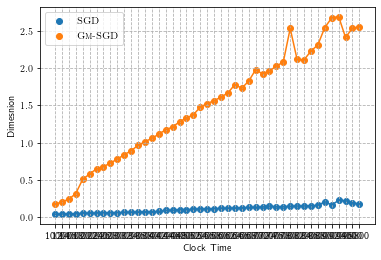

In [26]:
from matplotlib import rc
import json
from matplotlib.ticker import MaxNLocator

rc('text', usetex=True)

def smooth(y, box_pts):
    box = np.ones(box_pts) / box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def plot_timing(res_file: str, label):
    # d = [100, 1000, 10000, 100000]
    with open(res_file, 'rb') as f:
        res = json.load(f)
    
    if "config" in res:
        del res["config"]
    d = list(res.keys())
    t = list(res.values())

    # plt.yscale('log')
    t = smooth(y=t, box_pts=1)

    plt.scatter(d, t, label=label)
    plt.plot(d, t)
    # plt.xticks(np.arange(0, len(d)+1, 10))
    


d = 'result_dumps/timing_exp/'
o = [
        'mean',
        'gm',
        #'bgmd.0.1',
    #'bgmd.0.2',
    #'bgmd.0.5',
    ]
labels = [
        r"\textsc{SGD}",
    r"\textsc{Gm-SGD}",
    #r"\textsc{BGmD(0.1)}",
    #r"\textsc{BGmD(0.2)}",
    #r"\textsc{BGmD(0.5)}",
    ]

for op, label in zip(o, labels):
    result_file = d + op
    plot_timing(result_file, label)

plt.xlabel('Clock Time')
plt.ylabel('Dimesnion')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.tick_params(labelsize=10)
